<a href="https://colab.research.google.com/github/waqasahmad-developer/Ridge_Regression/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

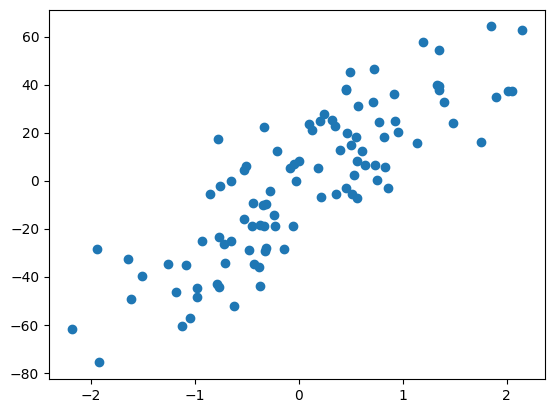

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [ ]:
from sklearn.linear_model import Ridge

# **Using Sklearn built-in class**

In [ ]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [ ]:
rr1 = Ridge(alpha=1)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[27.51130507]
-2.276241917183367


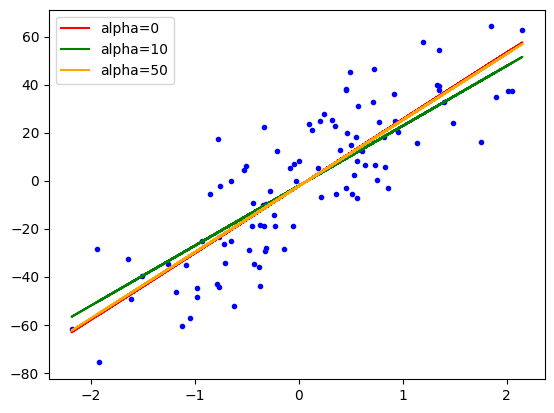

In [ ]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=50')
plt.legend()

# **Building my own Ridge class**

In [ ]:
class MeraRidge:
  def __init__(self,alpha=10):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None


  def fit(self,X_train,y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
      den = den + (X_train[i]- X_train.mean()) **2


    self.coef_ = num/(den +self.alpha)
    self.intercept_ = y_train.mean() - (self.coef_ * X_train.mean())

    print(self.coef_,self.intercept_)

  def predict(self,X_test):
    return self.coef_ * X_test + self.intercept_

In [ ]:
reg = MeraRidge(10)
reg.fit(X,y)

[24.9546267] [-2.126913]
